# Cut Face sandstone tilt data compilation

This notebook is for compiling field data from summer fieldwork 2020 for the tilt corrections for Cut Face sandstone.

- The goal is to compile all tilt measurements from notebooks and Clino fieldmove data and come up with a mean tilt orientation for pmag analyses. 

In [1]:
import sys
import pmagpy.pmag as pmag
import pmagpy.pmagplotlib as pmagplotlib
import pmagpy.ipmag as ipmag
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mplstereonet  # in PATH?

## Cutface Creek sandstone

In [2]:
planes = pd.read_csv('../data/combinedplanes.csv')
planes = planes[[' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth', ' strike', ' unitId']]
planes.head(10)

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
0,48.054902,-90.518397,Igneous Foliation,17.503448,201.868240,111.868240,Poplar Lake Intrusion
1,48.054965,-90.518427,Igneous Foliation,15.905780,199.729507,109.729507,Poplar Lake Intrusion
2,48.054981,-90.518477,Igneous Foliation,9.542009,207.324341,117.324341,Poplar Lake Intrusion
3,48.055039,-90.518280,Igneous Foliation,14.075377,211.441071,121.441071,Poplar Lake Intrusion
4,48.055045,-90.518259,Igneous Foliation,17.607458,201.341568,111.341568,Poplar Lake Intrusion
5,48.054973,-90.518490,Igneous Foliation,24.022133,235.558762,145.558762,Poplar Lake Intrusion
6,48.054889,-90.518316,Igneous Foliation,17.817057,187.128128,97.128128,Poplar Lake Intrusion
7,48.054921,-90.518233,Igneous Foliation,15.986528,201.656677,111.656677,Poplar Lake Intrusion
8,48.054888,-90.518257,Igneous Foliation,17.125648,182.341888,92.341888,Poplar Lake Intrusion
9,48.054800,-90.518306,Igneous Foliation,16.229546,206.431290,116.431290,Poplar Lake Intrusion


In [3]:
planes.columns

Index([' latitude', ' longitude', ' planeType', ' dip', ' dipAzimuth',
       ' strike', ' unitId'],
      dtype='object')

In [4]:
# filter for the bedding measurements

CF_planes = planes[(planes[' unitId'] == ' Cutface Creek sandstone') & (planes[' planeType'] == ' Bedding')]

CF_planes['pole_trend'] = (CF_planes[' dipAzimuth']+180)%360
CF_planes['pole_plunge'] = 90-CF_planes[' dip']
CF_planes

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId,pole_trend,pole_plunge
221,47.727571,-90.442533,Bedding,9.823921,146.686859,56.686859,Cutface Creek sandstone,326.686859,80.176079
222,47.727587,-90.442595,Bedding,11.817480,146.506927,56.506927,Cutface Creek sandstone,326.506927,78.182520
223,47.727582,-90.442594,Bedding,6.734155,177.580643,87.580643,Cutface Creek sandstone,357.580643,83.265845
224,47.727232,-90.442743,Bedding,10.030728,190.220154,100.220154,Cutface Creek sandstone,10.220154,79.969272
225,47.727479,-90.442674,Bedding,8.423083,169.595963,79.595963,Cutface Creek sandstone,349.595963,81.576917
226,47.727465,-90.442614,Bedding,11.170541,147.133591,57.133591,Cutface Creek sandstone,327.133591,78.829459
227,47.727631,-90.442684,Bedding,10.998850,146.835342,56.835342,Cutface Creek sandstone,326.835342,79.001150
228,47.727622,-90.442712,Bedding,11.661704,149.255753,59.255753,Cutface Creek sandstone,329.255753,78.338296
229,47.727825,-90.442720,Bedding,9.593727,170.141937,80.141937,Cutface Creek sandstone,350.141937,80.406273
230,47.727940,-90.442627,Bedding,7.917267,167.181808,77.181808,Cutface Creek sandstone,347.181808,82.082733


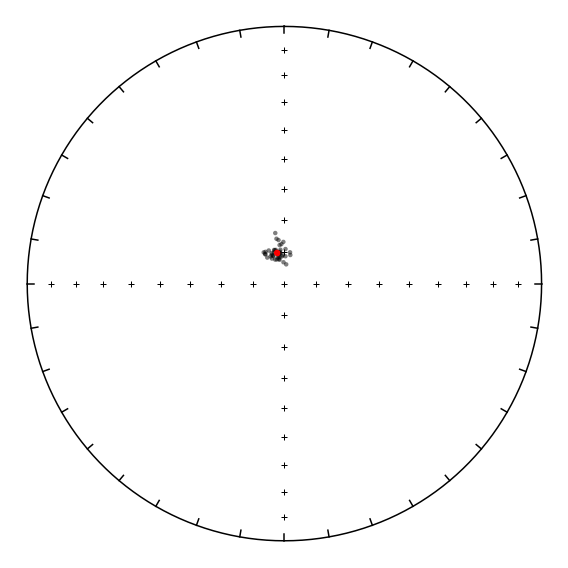

In [5]:
bedding_pole_trend = CF_planes['pole_trend'].tolist()
bedding_pole_plunge = CF_planes['pole_plunge'].tolist()

fignum = 1
plt.figure(num=fignum,figsize=(8,8))
ipmag.plot_net(fignum)
ipmag.plot_di(bedding_pole_trend,bedding_pole_plunge,alpha=0.5)

bedding_poles_mean = ipmag.fisher_mean(bedding_pole_trend,bedding_pole_plunge)
ipmag.plot_di_mean(bedding_poles_mean['dec'],bedding_poles_mean['inc'],
                   bedding_poles_mean['alpha95'],color='red')

In [6]:
bedding_mean_dip_direction = bedding_poles_mean['dec']-180
bedding_mean_dip = 90-bedding_poles_mean['inc']
print(bedding_mean_dip_direction,bedding_mean_dip)

166.50868128119532 9.98430487295937


In [9]:
bedding_poles_mean

{'dec': 346.5086812811953,
 'inc': 80.01569512704063,
 'n': 44,
 'r': 43.94895534744579,
 'k': 842.399700033865,
 'alpha95': 0.7417658298716042,
 'csd': 2.79078202513526}

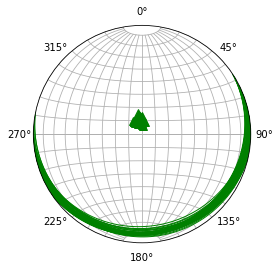

In [7]:
# plot the poles and planes for the bedding measurements
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = CF_planes[' dipAzimuth']-90, CF_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
# ax.rake(strike, dip, -25)
ax.grid()

plt.show()

## Terrace Point basalt 

In [8]:
TP_planes = planes[planes[' unitId'] == ' Terrace Point basalt']
TP_planes = TP_planes[TP_planes[' planeType'] ==' Bedding']

In [9]:
TP_Az_mean = TP_planes[' dipAzimuth'].mean()
TP_dip_mean = TP_planes[' dip'].mean()

In [10]:
print("Terrace Point average Dip Direction is " + str(TP_Az_mean) + " and average dip is " + str(TP_dip_mean)+ ".")

Terrace Point average Dip Direction is 229.33333333333334 and average dip is 5.333333333333333.


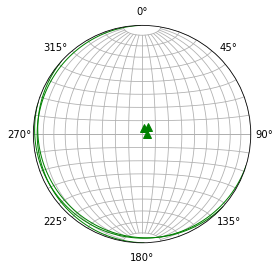

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = TP_planes[' dipAzimuth']-90, TP_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
# ax.rake(strike, dip, -25)
ax.grid()

plt.show()

## Good Harbor Bay Andesite

In [12]:
GH_planes = planes[planes[' unitId'] == ' Good Harbor Bay andesite']
GH_planes

,latitude,longitude,planeType,dip,dipAzimuth,strike,unitId
266,47.732921,-90.434242,Bedding,11.237436,198.650024,108.650024,Good Harbor Bay andesite
267,47.733024,-90.434286,Bedding,7.832314,208.016113,118.016113,Good Harbor Bay andesite
268,47.732932,-90.434256,Bedding,9.938019,198.938385,108.938385,Good Harbor Bay andesite
269,47.732984,-90.434102,Bedding,7.105858,203.816238,113.816238,Good Harbor Bay andesite
270,47.732972,-90.434145,Bedding,14.654791,156.971039,66.971039,Good Harbor Bay andesite
290,47.732916,-90.434298,Bedding,10.000000,177.000000,87.000000,Good Harbor Bay andesite
291,47.732916,-90.434288,Bedding,6.000000,164.000000,74.000000,Good Harbor Bay andesite
292,47.732917,-90.434270,Bedding,7.000000,191.000000,101.000000,Good Harbor Bay andesite
293,47.732919,-90.434274,Bedding,6.000000,215.000000,125.000000,Good Harbor Bay andesite
294,47.732940,-90.434259,Bedding,9.000000,217.000000,127.000000,Good Harbor Bay andesite


In [13]:
GH_Az_mean = GH_planes[' dipAzimuth'].mean()
GH_dip_mean = GH_planes[' dip'].mean()

In [14]:
print("Good Harbor average Dip Direction is " + str(GH_Az_mean) + " and average dip is " + str(GH_dip_mean)+ ".")

Good Harbor average Dip Direction is 183.95945332666668 and average dip is 9.717894553999999.


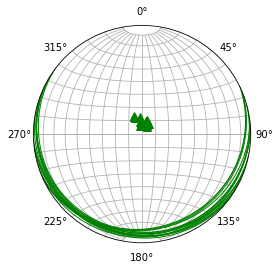

In [15]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

strike, dip = GH_planes[' dipAzimuth']-90, GH_planes [' dip']
ax.plane(strike, dip, 'g-', linewidth=1)
ax.pole(strike, dip, 'g^', markersize=8)
# ax.rake(strike, dip, -25)
ax.grid()

plt.show()

## Plot Cutface pmag directions



In [16]:
CF_mean_dec = 301.0
CF_mean_inc = 36.8
CF_mean_alpha95 = 6

CF_mean_tc = pmag.dotilt(CF_mean_dec,CF_mean_inc,bedding_mean_dip_direction,bedding_mean_dip)
CF_mean_dec_tc = CF_mean_tc[0]
CF_mean_inc_tc = CF_mean_tc[1]

In [17]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_direction_NSVG = pmag.vgp_di(NSVG_NE_plat,NSVG_NE_plon,48.054902,-90.518397)
CF_NSVG_dec = CF_direction_NSVG[0]
CF_NSVG_inc = CF_direction_NSVG[1]

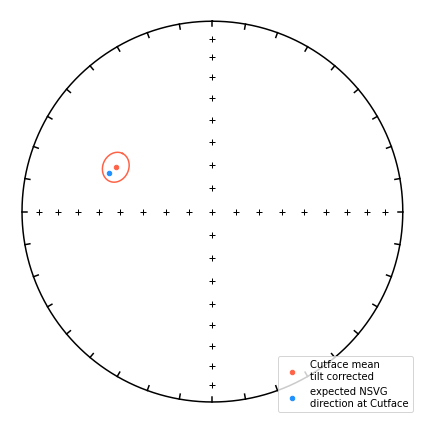

In [18]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(CF_mean_dec_tc,CF_mean_inc_tc,CF_mean_alpha95,color='tomato',
                   label='Cutface mean\ntilt corrected')
ipmag.plot_di_mean(CF_NSVG_dec,CF_NSVG_inc,0,color='dodgerblue',
                   label='expected NSVG\ndirection at Cutface')
plt.legend(loc=4)
plt.show()

In [19]:
CF_mean_inc_tc_08 = ipmag.unsquish(CF_mean_inc_tc,0.8)
CF_mean_inc_tc_06 = ipmag.unsquish(CF_mean_inc_tc,0.6)
CF_mean_inc_tc_04 = ipmag.unsquish(CF_mean_inc_tc,0.4)

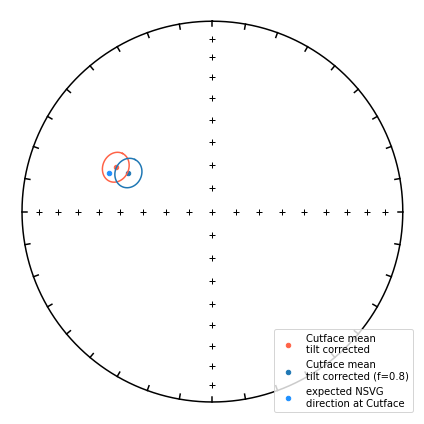

In [20]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(CF_mean_dec_tc,CF_mean_inc_tc,CF_mean_alpha95,color='tomato',
                   label='Cutface mean\ntilt corrected')
ipmag.plot_di_mean(CF_mean_dec_tc,CF_mean_inc_tc_08,CF_mean_alpha95,color='C0',
                   label='Cutface mean\ntilt corrected (f=0.8)')
ipmag.plot_di_mean(CF_NSVG_dec,CF_NSVG_inc,0,color='dodgerblue',
                   label='expected NSVG\ndirection at Cutface')
plt.legend(loc=4)
plt.show()

In [21]:
pmag.dia_vgp(301,60.89,6,47.73,-90.42)

(194.15441872066307, 48.77780696103741, 7.01749725002597, 9.1765988797763)

## remember to add 2.5 to the final calculation to offset the IGRF local dec correction.

In [22]:
pmag.dia_vgp(301,50.13,6,47.73,-90.42)

(181.01909494092706, 42.63435432745502, 5.37435262687034, 8.030705543253598)

<Figure size 360x360 with 0 Axes>

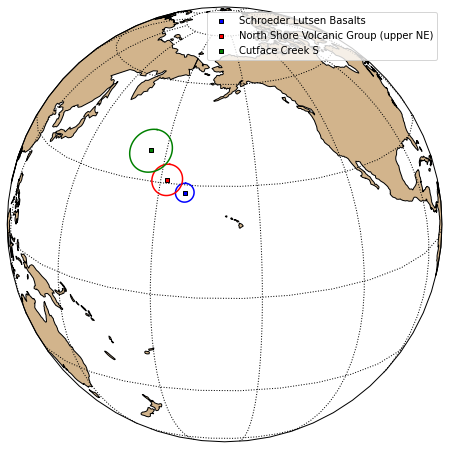

In [23]:
plt.figure(figsize=(5, 5))

map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)


ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts',
               marker='s',color='Blue')

ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

ipmag.plot_pole(map_axis,174.3,38.3,6,label='Cutface Creek S',
               marker='s',color='Green')

plt.legend()

plt.show()

<Figure size 360x360 with 0 Axes>

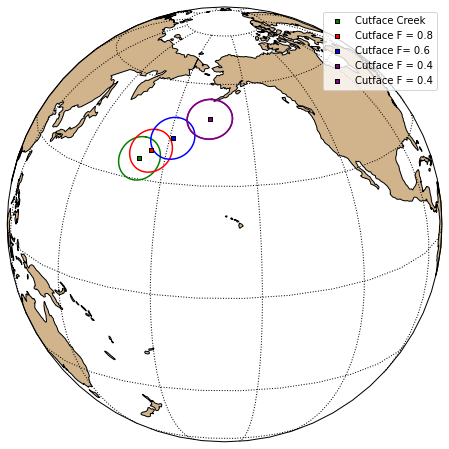

In [24]:
plt.figure(figsize=(5, 5))

map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,171,35.7,6,label='Cutface Creek',marker='s',color='Green')

ipmag.plot_pole(map_axis,174.3,38.3,6,label='Cutface F = 0.8',
               marker='s',color='Red')

ipmag.plot_pole(map_axis,181,42.6,6,label='Cutface F= 0.6',
               marker='s',color='Blue')


ipmag.plot_pole(map_axis,194,49,6,label='Cutface F = 0.4',
               marker='s',color='Purple')

ipmag.plot_pole(map_axis,194,49,6,label='Cutface F = 0.4',
               marker='s',color='Purple')



plt.legend()

plt.show()